In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 20,6

stream = pd.read_csv('stream_car.csv', na_values=' NULL')
# Данные по проезду автотранспорта на перекрестке. 
# Именование столбцов ХХcam/ХХbad:
#   XX - идентификатор камеры
#   XXcam - количество зафиксированных транспортных средств за час
#   ХХbad - процентное соотношение не распознанных транспортных средств за час
stream['date_time'] = pd.to_datetime(stream['date_time'])


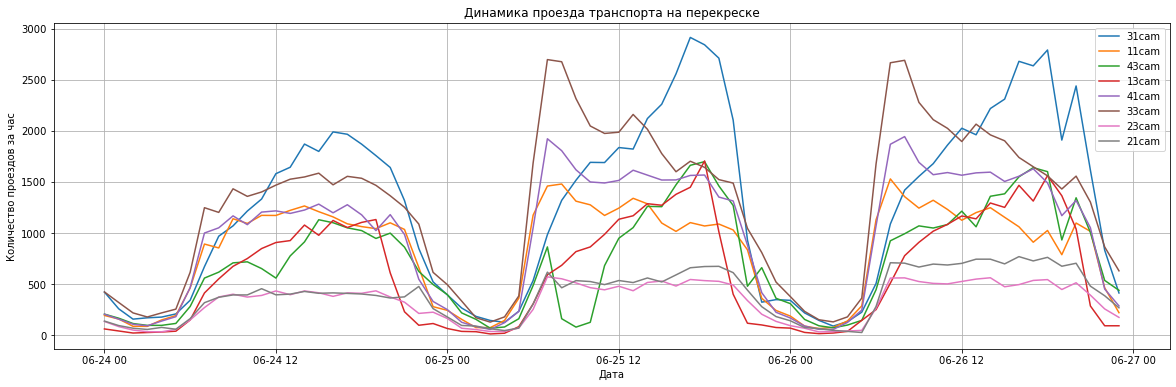

In [62]:
df = stream[stream['date_time'] < pd.to_datetime('2020-06-27')].set_index('date_time')

ax = plt.plot(df[[x for x in df.columns if 'cam' in x]])
plt.grid()
plt.title('Динамика проезда транспорта на перекреске')
plt.xlabel('Дата')
plt.ylabel('Количество проездов за час') 
plt.legend(df[[x for x in df.columns if 'cam' in x]])
# plt.show()

In [4]:

# - По данному графику видно, что 24.06 на 31 и 33 камерах поток транспорта ниже чем в следующие дни, причиной этому может быть затруднение проезда(ремонтные работы, ДТП и тд)
# - 31 и 33, 11 и 13, 23 и 21 предположительно пары камер стоят в противоположных направлениях

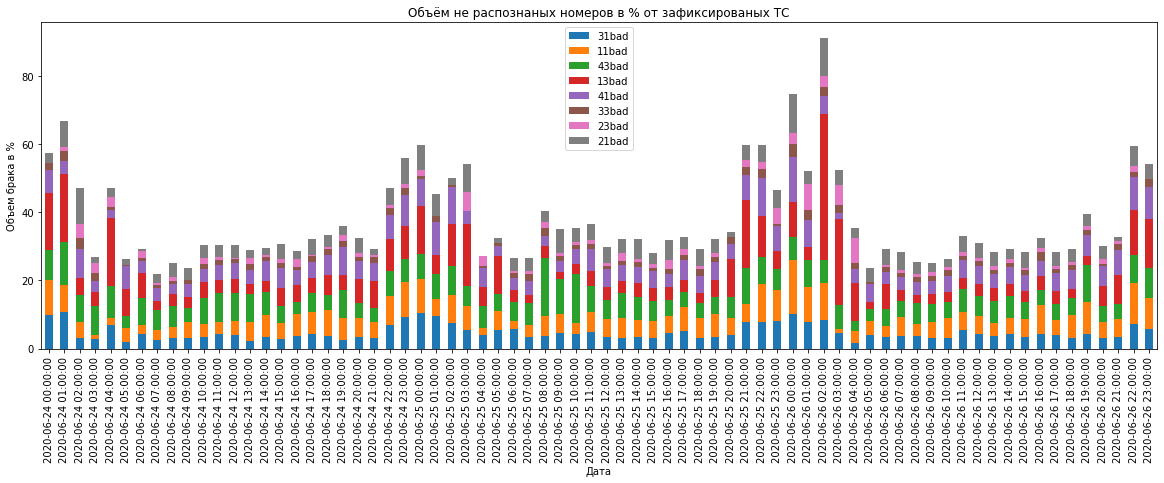

In [19]:
plt_bad = df[[x for x in df.columns if 'bad' in x]].plot(
    kind='bar',
    stacked=True,
    title='Объём не распознаных номеров в % от зафиксированых ТС',
    xlabel='Дата',
    ylabel='Объем брака в %'
)
plt.show()

In [ ]:
# Объем брака увеличивается в вечернее и ночное время суток, предположительно это связано с снижением освещенности проезжей части

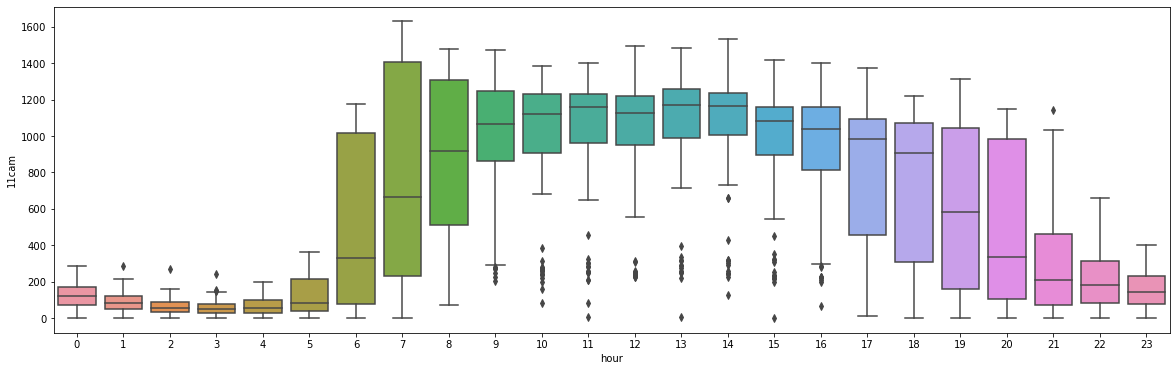

In [87]:
df_box = stream[[x for x in stream.columns if 'cam' in x]+['date_time']]
df_box['hour'] = df_box['date_time'].dt.hour
df_box = df_box.drop('date_time', axis=1)
sns.boxplot(x="hour", y="11cam", data=df_box)

In [ ]:
# Ночью и днем более узкий размах чем утром и вечером, по моему мнению это из-за разного трафика в рабочие и выходные/праздничные дни. Выходные дни утром и вечером поток ниже а в будни выше. В дневное время есть выбросы, предположительно из-за затрудненного движения либо неисправности камеры

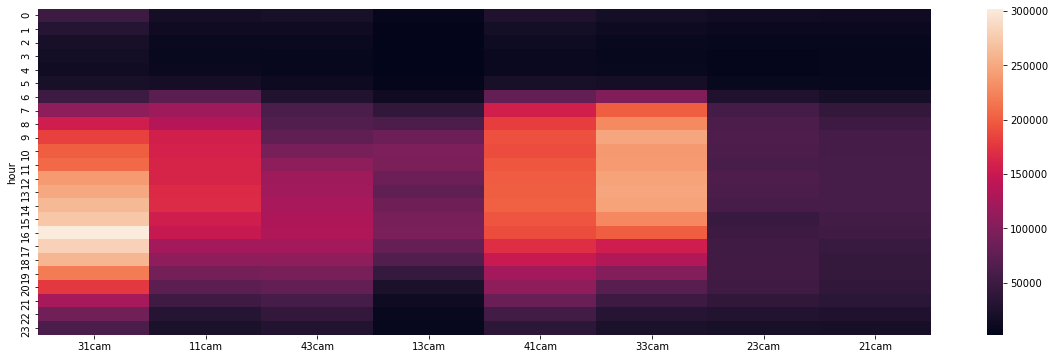

In [94]:
df_map = stream[[x for x in stream.columns if 'cam' in x]+['date_time']]
df_map['hour'] = df_map['date_time'].dt.hour
df_map = df_map.groupby('hour').sum()
# df_map = df_map.drop('date_time', axis=1)
df_map.head()
sns.heatmap(df_map)

In [ ]:
# 31, 41, 33 камеры фиксируют больше проезжающих транспортных средств